In [4]:
import numpy as np
import pandas as pd
from sympy import *
from numpy.linalg import *
import matplotlib.pyplot as plt
def value_as(func,data):
    x = symbols('x')
    return (func if str(func).isdigit() else func.evalf(subs={x:data}))
def gram_matrix(data_dict,func_list,orth=False):
    for i in range(len(func_list)):
        row = []
        for j in range(len(func_list)):
            coeff = 0
            if orth:
                if i == j:
                    for data in list(data_dict.keys()):
                        coeff += float(value_as(func_list[i],data)*value_as(func_list[j],data))
            else:
                for data in list(data_dict.keys()):
                    coeff += float(value_as(func_list[i],data)*value_as(func_list[j],data))
            row.append(coeff)
        gram_matrix = (np.array(row) if i == 0 else np.vstack((gram_matrix,row)))
    return gram_matrix
def sol_matrix(data_dict,func_list):
    x = symbols('x')
    sol_matrix = []
    for i in range(len(func_list)):
        sol = 0
        for data in list(data_dict.keys()):   
            sol += float(value_as(func_list[i],data)*data_dict[data])
        sol_matrix.append(sol)
    sol_matrix = np.array(sol_matrix).transpose()
    return sol_matrix
def curve_fitting(orth=False):
    data_dict = eval(input('输入数据如{11:5,2:3}:'))
    x = symbols('x')
    func_list = []
    p_func = input('fitting function span:')
    while len(str(p_func))>0:
        func_list.append(eval(p_func))
        p_func = input('Next span:')
    solution = solve(gram_matrix(data_dict,func_list),sol_matrix(data_dict,func_list))
    print('{}{}={}'.format(gram_matrix(data_dict,func_list),solution,sol_matrix(data_dict,func_list)))
    y = 0
    for i in range(len(solution)):
        y += func_list[i]*solution[i]
    print('函数为{}'.format(y))
    return y
curve_fitting()

输入数据如{11:5,2:3}:{0:1,0.3:1.25,0.4:1.3,0.5:1.35,0.6:1.6,0.8:1.8,0.9:2.6,1:3}
fitting function span:1
Next span:x
Next span:(3*x**2-1)/2
Next span:(5*x**3-3*x)/2
Next span:
[[ 8.          4.5         0.965      -0.0675    ]
 [ 4.5         3.31        1.7595      0.76375   ]
 [ 0.965       1.7595      2.190875    1.6689375 ]
 [-0.0675      0.76375     1.6689375   1.89056875]][-0.48396133  4.61238375 -2.96120088  1.87373969]=[13.9      9.31     4.288    2.15575]
函数为4.6843492288653*x**3 - 4.44180131479387*x**2 + 1.80177421629936*x + 0.996639111232956


4.6843492288653*x**3 - 4.44180131479387*x**2 + 1.80177421629936*x + 0.996639111232956

In [2]:
print({np.e**(-1):2,np.e**0:3,np.e**1:5,np.e**2:9})
curve_fitting()

{0.36787944117144233: 2, 1.0: 3, 2.718281828459045: 5, 7.3890560989306495: 9}
输入数据如{11:5,2:3}:{0:1,0.3:1.25,0.4:1.3,0.5:1.35,0.6:1.6,0.8:1.8,0.9:2.6,1:3}
fitting function span:1
Next span:x
Next span:(3*x**2-1)/2
Next span:(5*x**3-3*x)/2
Next span:
[[ 8.          4.5         0.965      -0.0675    ]
 [ 4.5         3.31        1.7595      0.76375   ]
 [ 0.965       1.7595      2.190875    1.6689375 ]
 [-0.0675      0.76375     1.6689375   1.89056875]][-0.48396133  4.61238375 -2.96120088  1.87373969]=[13.9      9.31     4.288    2.15575]
曲线拟合函数为4.6843492288653*x**3 - 4.44180131479387*x**2 + 1.80177421629936*x + 0.996639111232956


4.6843492288653*x**3 - 4.44180131479387*x**2 + 1.80177421629936*x + 0.996639111232956

输入数据如{11:5,2:3}:{0.0:1,0.1:0.41,0.2:0.5,0.3:0.61,0.5:0.91,0.8:2.02,1:2.46}
fitting function span:1
Next span:x
Next span:x**2
Next span:x**3
Next span:
[[7.       2.9      2.03     1.673   ]
 [2.9      2.03     1.673    1.4819  ]
 [2.03     1.673    1.4819   1.36169 ]
 [1.673    1.4819   1.36169  1.278563]][ 0.92658701 -4.65906624 12.81472509 -6.62206149]=[7.91    4.855   4.0593  3.62887]
曲线拟合函数为-6.62206149153383*x**3 + 12.8147250886829*x**2 - 4.65906623876484*x + 0.926587005389689
输入数据如{11:5,2:3}:{0.0:1,0.1:0.41,0.2:0.5,0.3:0.61,0.5:0.91,0.8:2.02,1:2.46}
fitting function span:1
Next span:x
Next span:x**2
Next span:x**3
Next span:x**4
Next span:
[[7.         2.9        2.03       1.673      1.4819    ]
 [2.9        2.03       1.673      1.4819     1.36169   ]
 [2.03       1.673      1.4819     1.36169    1.278563  ]
 [1.673      1.4819     1.36169    1.278563   1.2177593 ]
 [1.4819     1.36169    1.278563   1.2177593  1.17174659]][  0.94272095  -5.29872762  16.27473974 -12.33482554   2

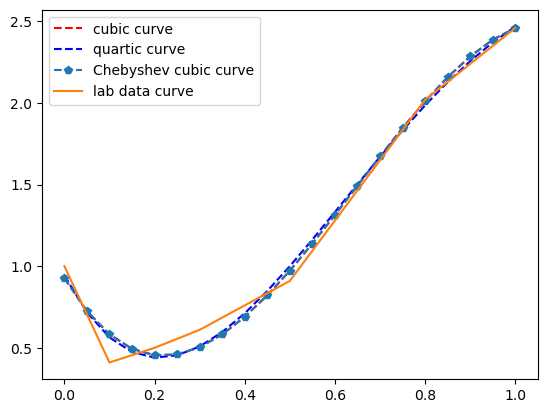

In [4]:
x_list = list(np.linspace(0,1,21,endpoint=True))
data_dict = {0.0:1,0.1:0.41,0.2:0.5,0.3:0.61,0.5:0.91,0.8:2.02,1:2.46}
func_1,y_list_1 = curve_fitting(),[]
func_2,y_list_2 = curve_fitting(),[]
func_3,y_list_3 = curve_fitting(orth=True),[]
for m in x_list:
    y_list_1.append(value_as(func_1,m))
    y_list_2.append(value_as(func_2,m))
    y_list_3.append(value_as(func_3,m))
plt.plot(x_list,y_list_1,'r--',label='cubic curve')
plt.plot(x_list,y_list_2,'b--',label='quartic curve')
plt.plot(x_list,y_list_3,'p--',label='Chebyshev cubic curve')
plt.plot(data_dict.keys(),data_dict.values(),label='lab data curve')
plt.legend(loc='best')


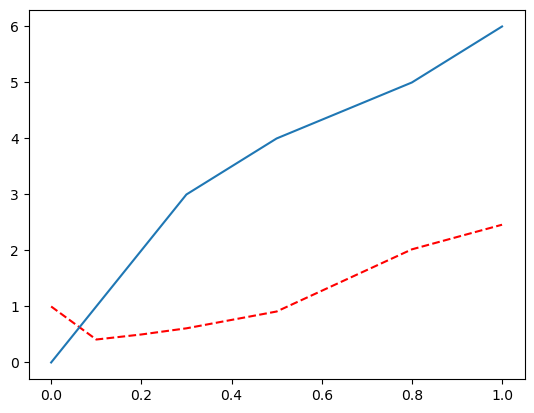